<a href="https://colab.research.google.com/github/haritanair/IMDB-Sentiment-Analysis/blob/main/Sentiment_Analysis_using_Deep_Learning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import nltk

# Download stopwords and WordNet Lemmatizer (ensure you have NLTK data)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
from google.colab import files
uploaded =files.upload()
df=pd.read_csv("IMDB Dataset.csv")

# Show the first few rows of the dataset
df.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Saving IMDB Dataset.csv to IMDB Dataset.csv


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#Data Preparation for LSTM, GRU and CNN models

In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Map string labels to integers (1 for positive, 0 for negative)
label_mapping = {'positive': 1, 'negative': 0}
df['label'] = df['sentiment'].map(label_mapping)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.2, random_state=42)

# Function to clean the text
def clean_text(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)  # Remove punctuation
    return review

# Clean the reviews
X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)

# Tokenization
max_words = 5000  # Maximum number of words to keep, based on frequency
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
max_len = 100  # Maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


#Defining the models

##LSTM Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    return model



##GRU Model

In [5]:
from tensorflow.keras.layers import GRU

def create_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(GRU(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    return model


##CNN Model

In [6]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

def create_cnn_model():
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    return model


#Training and Evaluation Function

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

def train_and_evaluate_model(model, X_train_pad, y_train, X_test_pad, y_test):
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Train the model
    history = model.fit(X_train_pad, y_train,
                        epochs=5,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=1)  # Set verbose=1 for progress

    # Evaluate on the test set
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
    return accuracy


In [8]:
# Train and evaluate LSTM
lstm_model = create_lstm_model()
lstm_accuracy = train_and_evaluate_model(lstm_model, X_train_pad, y_train, X_test_pad, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 173s 171ms/step - accuracy: 0.7481 - loss: 0.5031 - val_accuracy: 0.8491 - val_loss: 0.3647
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 208s 177ms/step - accuracy: 0.8746 - loss: 0.3104 - val_accuracy: 0.8478 - val_loss: 0.4121
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 194s 169ms/step - accuracy: 0.9015 - loss: 0.2478 - val_accuracy: 0.8414 - val_loss: 0.3602
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 210s 177ms/step - accuracy: 0.9202 - loss: 0.2047 - val_accuracy: 0.8531 - val_loss: 0.3728
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 170s 170ms/step - accuracy: 0.9375 - loss: 0.1655 - val_accuracy: 0.8380 - val_loss: 0.4026
LSTM Model Accuracy: 0.8419


In [9]:
# Train and evaluate GRU
gru_model = create_gru_model()
gru_accuracy = train_and_evaluate_model(gru_model, X_train_pad, y_train, X_test_pad, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')



Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 137s 135ms/step - accuracy: 0.7287 - loss: 0.5108 - val_accuracy: 0.8530 - val_loss: 0.3450
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 145s 138ms/step - accuracy: 0.8873 - loss: 0.2799 - val_accuracy: 0.8637 - val_loss: 0.3271
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 139s 135ms/step - accuracy: 0.9232 - loss: 0.2056 - val_accuracy: 0.8561 - val_loss: 0.3384
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 141s 134ms/step - accuracy: 0.9426 - loss: 0.1580 - val_accuracy: 0.8508 - val_loss: 0.3862
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 142s 134ms/step - accuracy: 0.9600 - loss: 0.1168 - val_accuracy: 0.8415 - val_loss: 0.4773
GRU Model Accuracy: 0.8408


In [10]:
# Train and evaluate CNN
cnn_model = create_cnn_model()
cnn_accuracy = train_and_evaluate_model(cnn_model, X_train_pad, y_train, X_test_pad, y_test)
print(f'CNN Model Accuracy: {cnn_accuracy:.4f}')

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 55s 54ms/step - accuracy: 0.7027 - loss: 0.5166 - val_accuracy: 0.8540 - val_loss: 0.3302
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.8927 - loss: 0.2607 - val_accuracy: 0.8504 - val_loss: 0.3550
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.9298 - loss: 0.1808 - val_accuracy: 0.8521 - val_loss: 0.3750
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.9710 - loss: 0.0879 - val_accuracy: 0.8495 - val_loss: 0.4758
CNN Model Accuracy: 0.8501


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Replace 'lstm_model', 'gru_model', and 'cnn_model' with your actual model variables
# Assuming X_test_pad is your test data, and y_test contains the true labels

# LSTM Predictions
y_pred_lstm_prob = lstm_model.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# GRU Predictions
y_pred_gru_prob = gru_model.predict(X_test_pad)
y_pred_gru = (y_pred_gru_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# CNN Predictions
y_pred_cnn_prob = cnn_model.predict(X_test_pad)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate LSTM
print("LSTM Model Evaluation:")
print(classification_report(y_test, y_pred_lstm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lstm))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_lstm_prob):.4f}')

# Evaluate GRU
print("\nGRU Model Evaluation:")
print(classification_report(y_test, y_pred_gru))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gru))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_gru_prob):.4f}')

# Evaluate CNN
print("\nCNN Model Evaluation:")
print(classification_report(y_test, y_pred_cnn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cnn))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_cnn_prob):.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      4961
           1       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[4185  776]
 [ 805 4234]]
ROC AUC Score: 0.9207

GRU Model Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      4961
           1       0.82      0.87      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:
 [[4023  938]
 [ 654 4385]]
ROC AUC Score: 0.9232

CNN Model Evaluation:
             

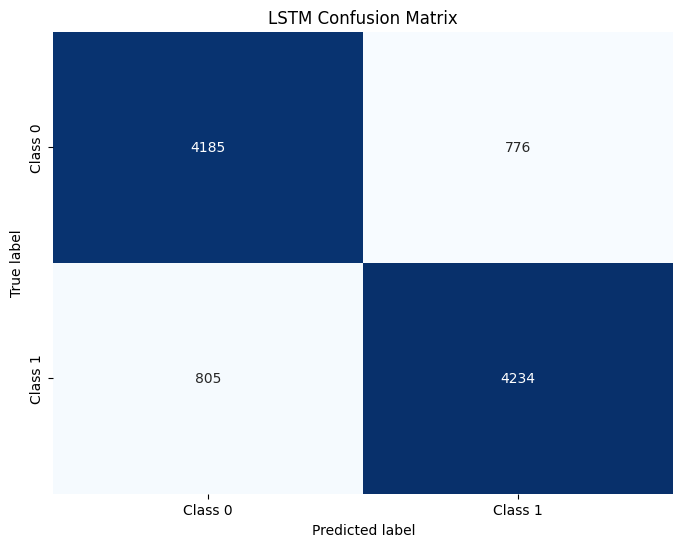

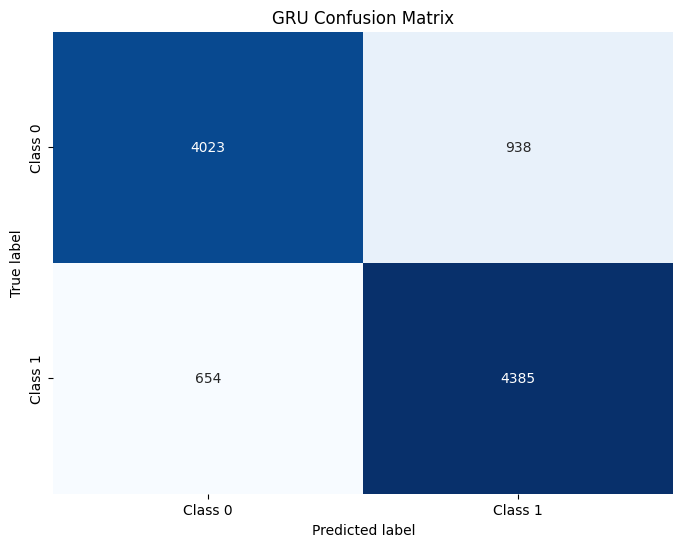

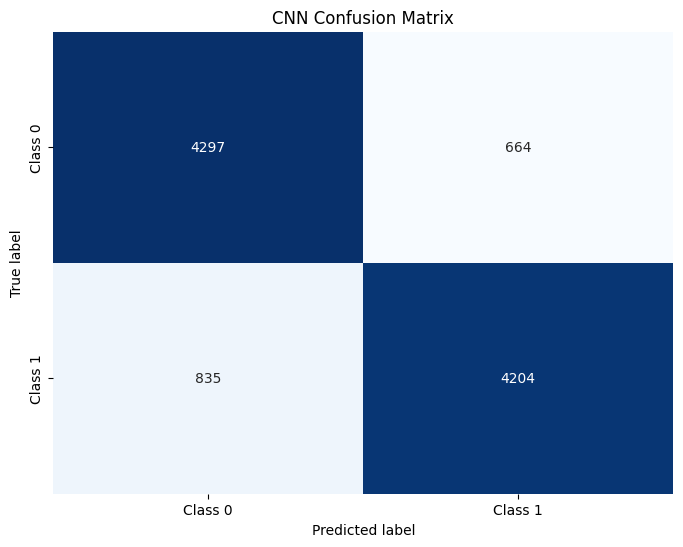

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot for LSTM
plot_confusion_matrix(confusion_matrix(y_test, y_pred_lstm), title='LSTM Confusion Matrix')

# Repeat for GRU and CNN
plot_confusion_matrix(confusion_matrix(y_test, y_pred_gru), title='GRU Confusion Matrix')
plot_confusion_matrix(confusion_matrix(y_test, y_pred_cnn), title='CNN Confusion Matrix')


#Model Ensembling

In [13]:
import numpy as np

# Average the predicted probabilities
y_pred_avg_prob = (y_pred_lstm_prob + y_pred_gru_prob + y_pred_cnn_prob) / 3
y_pred_avg = (y_pred_avg_prob > 0.5).astype(int)

# Evaluate the ensemble model
print("\nEnsemble Model Evaluation:")
print(classification_report(y_test, y_pred_avg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_avg))
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_avg_prob):.4f}')



Ensemble Model Evaluation:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Confusion Matrix:
 [[4242  719]
 [ 663 4376]]
ROC AUC Score: 0.9380
